<a href="https://colab.research.google.com/github/kimdfarm/2025-1-myclass-BDA/blob/main/inclass/05w_B_tue_0402_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#05주차 수업

In [1]:
import numpy as np
import pandas as pd



In [27]:
df_raw = pd.DataFrame({'var1':[1,2,1],'var2':[2,3,2] , 'var3':[10,20,30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [15]:
df_new  = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [10]:
id(df_new) ==id(df_raw)

False

In [16]:
df_new.rename(columns={'var2':'va2'},inplace=True)
df_new

,var1,va2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [17]:
df_new.rename(index={0:'x', 1:'y',2:'z'},inplace=True)
df_new

,var1,va2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [22]:
df = pd.DataFrame({'A':[1,2,3],'B':[4,5,6]})
df.rename(columns={'A':'a','B':'c'},inplace=True)
df

,a,c
0,1,4
1,2,5
2,3,6


# 파생변수 생성

In [23]:
df = pd.DataFrame({'var1':[4,3,8],'var2':[2,6,1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [24]:
df1 = df.copy()

In [25]:
df1['var_sum'] = df1['var1'] + df1['var2']
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [26]:
df1['var_mean'] = (df1['var1'] + df1['var2']) / 2
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [28]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [30]:
df2.sum()

,0
var1,15
var2,9


In [31]:
df2.sum(axis=0)

,0
var1,15
var2,9


In [32]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [33]:
df2['var_sum'] = df2.sum(axis=1)
df2

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [34]:
df2['var_sum'] = df2.sum(axis='columns')
df2

,var1,var2,var_sum
0,4,2,12
1,3,6,18
2,8,1,18


In [36]:
df2[['var1' , 'var2']]

,var1,var2
0,4,2
1,3,6
2,8,1


In [37]:
df2[['var1' , 'var2']].mean()


,0
var1,5.0
var2,3.0


In [38]:
df2[['var1' , 'var2']].mean(axis=1)

,0
0,3.0
1,4.5
2,4.5


In [39]:
df2['var_mean'] = df2[['var1' , 'var2']].mean(axis=1)
df2

,var1,var2,var_sum,var_mean
0,4,2,12,3.0
1,3,6,18,4.5
2,8,1,18,4.5


In [40]:
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [42]:
df1['var_mean'] = df1[['var1' , 'var2']].mean(axis=1)
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


#mpg 연비 변수 생성

In [43]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 3.92 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [44]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [45]:
mpg.sample()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan


In [47]:
mpg.cty+mpg.hwy

,0
0,47
1,50
2,51
3,51
4,42
...,...
229,47
230,50
231,42
232,44


In [48]:
mpg.total = (mpg.cty+mpg.hwy) / 2
mpg.head()

<ipython-input-48-1112a1a66fd1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mpg.total = (mpg.cty+mpg.hwy) / 2


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [49]:
mpg['total'] = (mpg.cty+mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [51]:
mpg['mpg_mean'] = mpg[['cty','hwy']].mean(axis='columns')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [54]:
sum(mpg.total) / len(mpg.total)

20.14957264957265

In [55]:
mpg.total.mean()

np.float64(20.14957264957265)

In [56]:
mpg['total'].mean()

np.float64(20.14957264957265)

# 조건문 활용

In [57]:
mpg.total.describe()

,0
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


<Axes: ylabel='Frequency'>

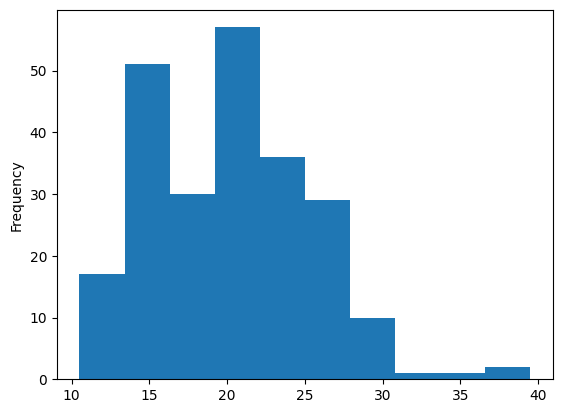

In [58]:
mpg.total.plot.hist()

In [60]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.1 MB/s eta 0:00:00


In [64]:
import koreanize_matplotlib

<Axes: title={'center': '히스토그램'}, ylabel='Frequency'>

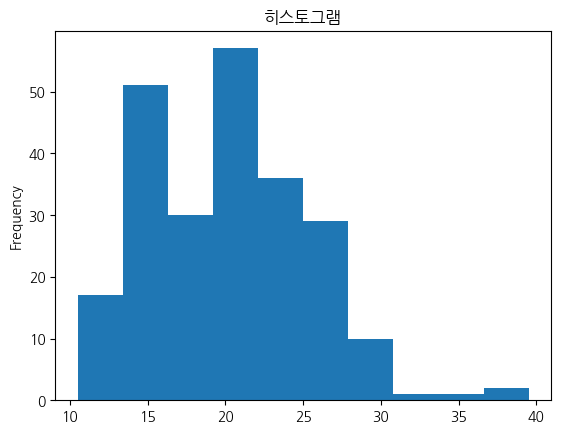

In [65]:
mpg['total'].plot(kind="hist",title="히스토그램")

<Axes: xlabel='total', ylabel='Count'>

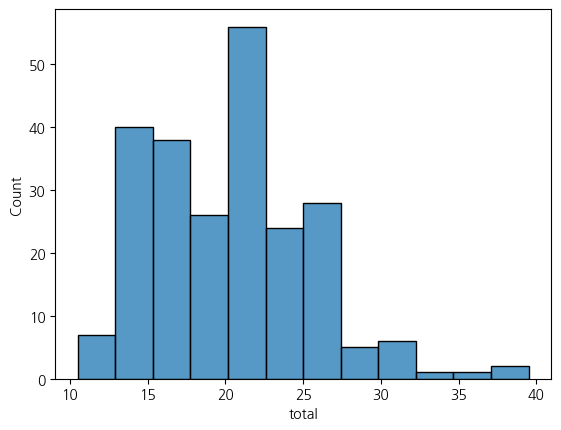

In [66]:
import seaborn as sns

sns.histplot(mpg , x="total")